<a href="https://colab.research.google.com/github/atefar2/DAD-CORP-LLC/blob/master/Copy_of_Copy_of_Python_Programming_for_Finance_p_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

!pip install pandas
!pip install numpy
!pip install matplotlib
#!pip install quandl
!pip install statsmodels 
#!pip install gs_quant
!pip install pandas-ta


In [0]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import pandas_datareader.data as web
import datetime
#import quandl
import statsmodels.api as sm
#import gs_quant as gs
#import gs_quant.timeseries as ts
#from gs_quant.timeseries import Window
import os
import pandas_ta as ta


In [0]:


start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,2,29)

#QUANDL_api_key = 'qpmUo-eN7ZiNgAL1FUj6'


In [0]:


#quandl.ApiConfig.api_key = 'qpmUo-eN7ZiNgAL1FUj6'
#mydata = quandl.get('WIKI/APPL')
#mydata.head()

In [0]:
 
spy = web.DataReader('spy','yahoo',start,end,)
#gush = web.DataReader('gush','yahoo',start,end,)
#drip = web.DataReader('drip','yahoo',start,end,)
#gasl = web.DataReader('gasl','yahoo',start,end,)
#gasx = web.DataReader('gasx','yahoo',start,end,)
#uwt = web.DataReader('uwt','yahoo',start,end,)
#dwt = web.DataReader('dwt','yahoo',start,end,)
#ovx = web.DataReader('^ovx','yahoo',start,end,)
vix = web.DataReader('^vix','yahoo',start,end,)
spy5 = web.DataReader('^GSPC','yahoo',start,end,)
#soxl = web.DataReader('soxl','yahoo',start,end,)
#dust = web.DataReader('dust','yahoo',start,end,)
#nugt = web.DataReader('nugt','yahoo',start,end,)
#jdst = web.DataReader('jdst','yahoo',start,end,)
#jnug = web.DataReader('jnug','yahoo',start,end,)


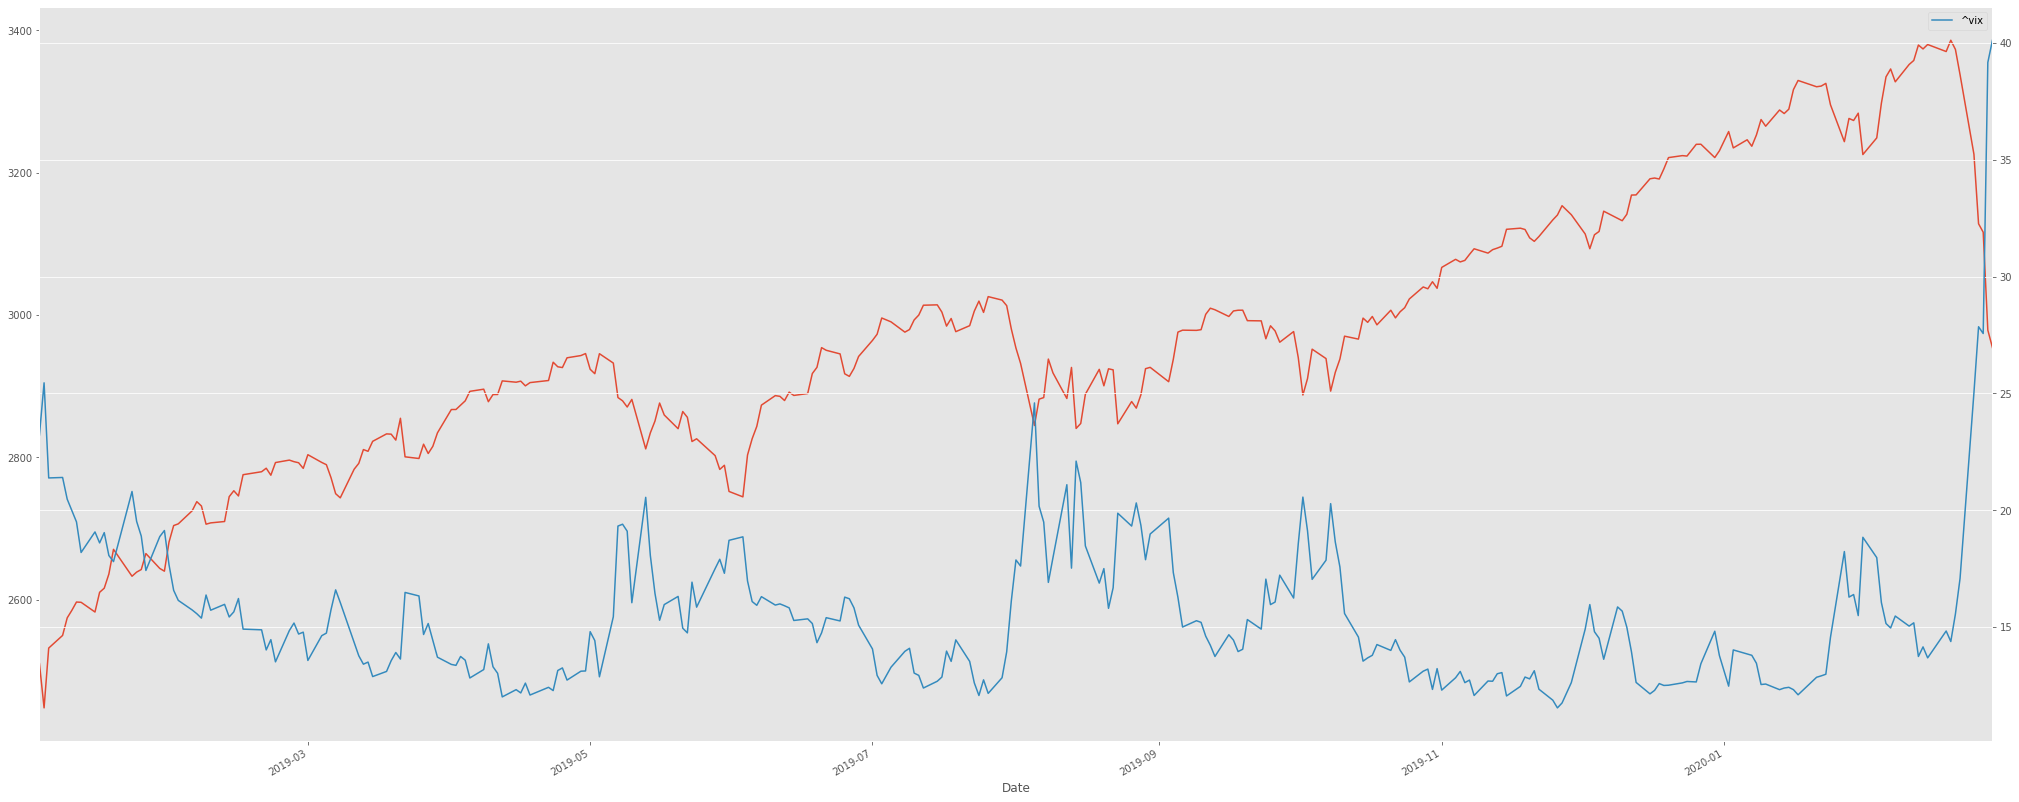

In [0]:
%matplotlib inline
plt.style.use('ggplot')

spy5.Close.plot(label= '^GSPC',figsize=(35,15),secondary_y=False)
#ovx.Close.plot(label= '^ovx',figsize=(35,15),secondary_y=False)
#spy.Close.plot(label= 'spy',figsize=(35,15),secondary_y=False)
vix.Close.plot(label= '^vix',figsize=(35,15),secondary_y=True)
#gush.Close.plot(label= 'gush',figsize=(35,15),secondary_y=False)
##gasl.Close.plot(label= 'gasl',figsize=(35,15),secondary_y=False)
#gasx.Close.plot(label= 'gasx',figsize=(35,15),secondary_y=False)
#drip.Close.plot(label= 'drip',figsize=(35,15),secondary_y=False)
#uwt.Close.plot(label= 'uwt',figsize=(35,15),secondary_y=True)
#dwt.Close.plot(label= 'dwt',figsize=(35,15),secondary_y=False)
#soxl.Close.plot(label= 'soxl',figsize= (35,15),secondary_y=False,)
#dust.Close.plot(label= 'dust',figsize= (35,15),secondary_y=False)
#jdst.Close.plot(label= 'jdst',figsize= (35,15),secondary_y=False)
#nugt.Close.plot(label= 'nugt',figsize= (35,15),secondary_y=False)
#jnug.Close.plot(label= 'jnug',figsize= (35,15),secondary_y=False)

#plt.grid(b=None, which='major',axis='both',)      
plt.legend()
plt.show()


In [0]:
spy5.dropna(inplace=True)
spy5.index = pd.to_datetime(spy5.index)



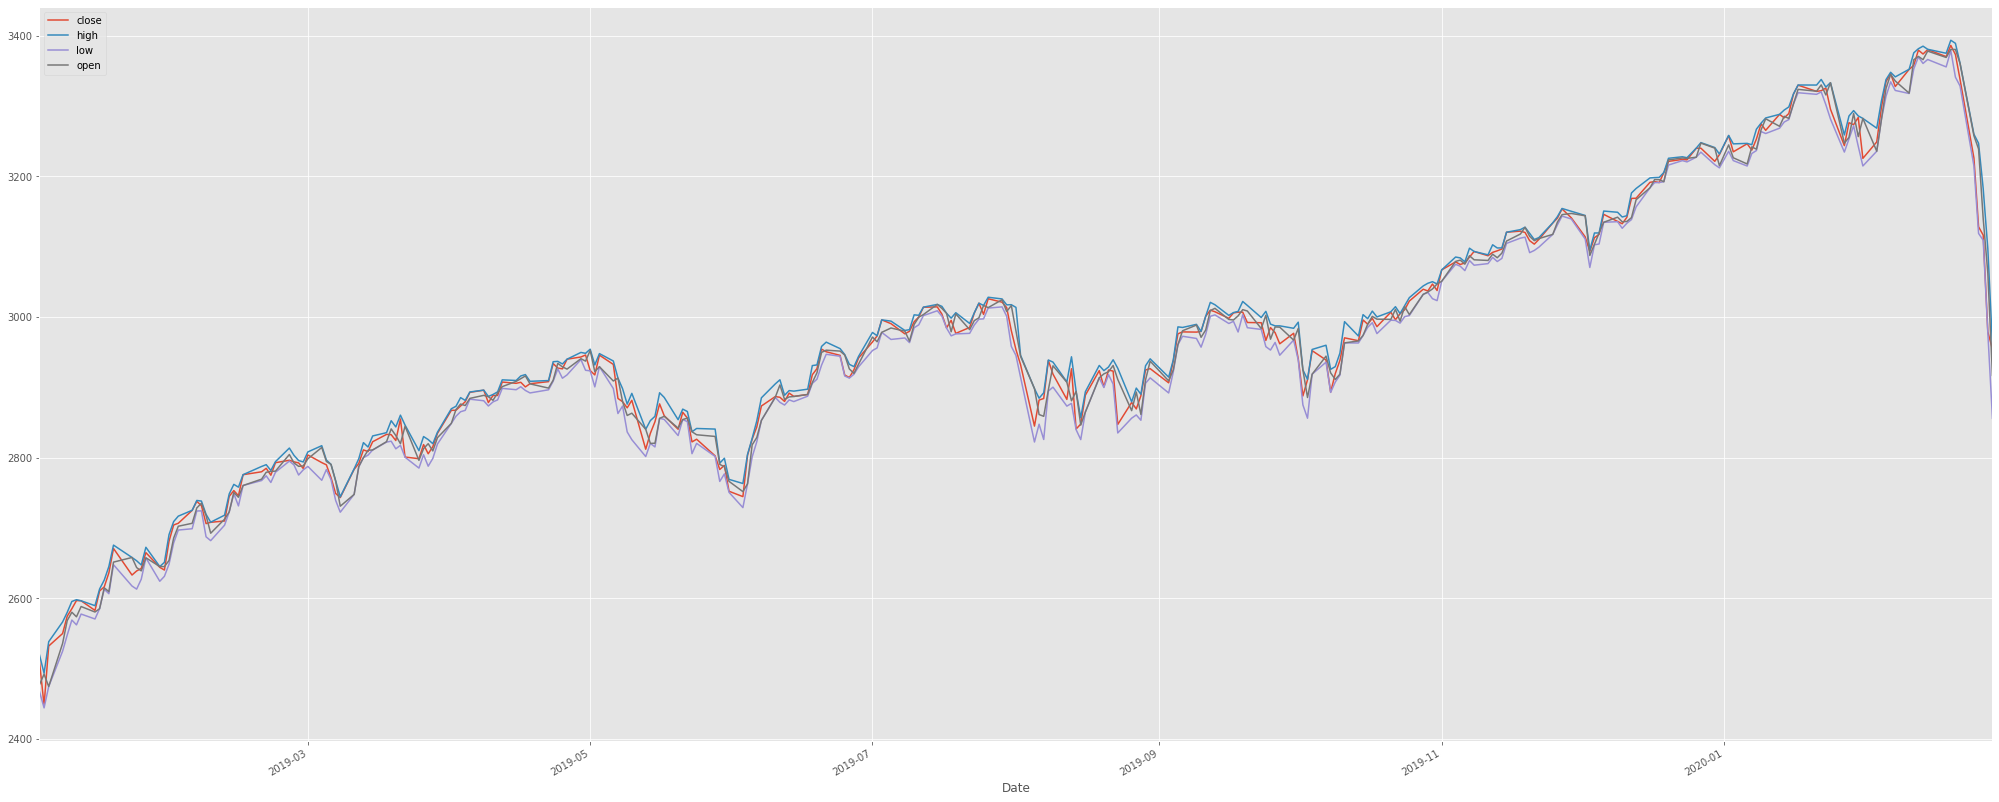

In [0]:


spy5.Close.plot(label= 'close',figsize= (35,15),secondary_y=False,)
spy5.High.plot(label= 'high',figsize= (35,15),secondary_y=False,)
spy5.Low.plot(label= 'low',figsize= (35,15),secondary_y=False,)
spy5.Open.plot(label= 'open',figsize= (35,15),secondary_y=False,)
plt.legend()


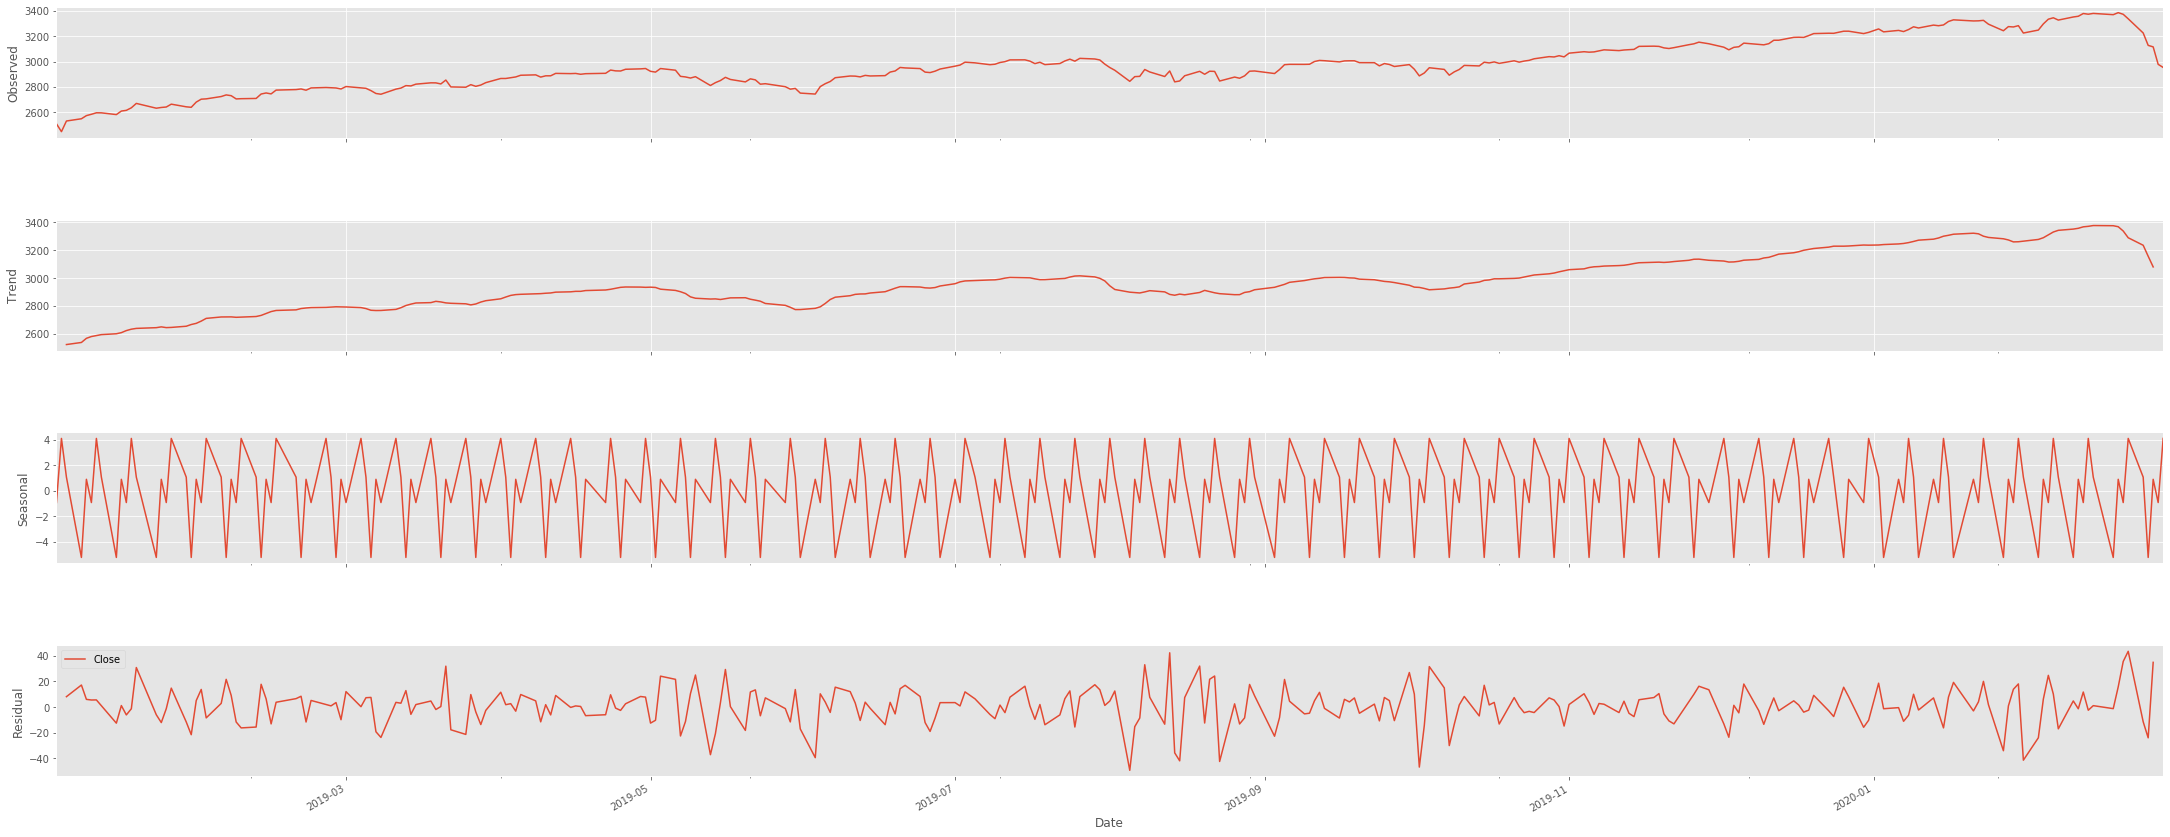

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(spy5.Close,model="additive",freq=5)

fig = result.plot()
plt.grid()
fig.set_size_inches(35,15)

plt.legend()



In [0]:
plt.figure()
plt.grid()
vix.Close.plot(label= '^vix',figsize=(35,15),secondary_y=False)
#spy.Close.plot(label= 'spy',figsize=(35,15),secondary_y=True, style='b')
spy5.Close.plot(label= 'spy5',figsize=(35,15),secondary_y=True, style='g',grid=True)


plt.legend()
spy5.describe()

In [0]:
df = pd.DataFrame(spy5)

In [0]:
#fast_k = 100 * (spy['Close'] - spy.min['Low']) / spy.High
                
#spy['stoch'] = ta.stoch(high=spy['High'],low=spy['Low'],close=spy['Close'], fast_k= 100 * (spy['Close'] - spy.min['Low']

In [0]:
df['new'] = df['High']/df['Adj Close']
df


,High,Low,Open,Close,Volume,Adj Close,new
Date,,,,,,,
2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029,1.003769
2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3822860000,2447.889893,1.018485
2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4213410000,2531.939941,1.002421
2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4104710000,2549.689941,1.006460
2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4083030000,2574.409912,1.002102
...,...,...,...,...,...,...,...
2020-02-14,3380.689941,3366.149902,3378.080078,3380.159912,3398040000,3380.159912,1.000157
2020-02-18,3375.010010,3355.610107,3369.040039,3370.290039,3746720000,3370.290039,1.001400
2020-02-19,3393.520020,3378.830078,3380.389893,3386.149902,3600150000,3386.149902,1.002177


In [0]:
spy5['hma'] = ta.hma(spy5['Close'], length=25)
spy5['hma2'] = ta.ema(spy5['Close'], length=20)
spy5['hma3'] = ta.ema(spy5['Close'], length=40)
spy5['hma4'] = ta.ema(spy5['Close'], length=50)
spy5['ema'] = ta.ema(spy5.Close, length=15)
buy = [spy5['hma2'] > spy5['ema']]
sell = [spy5['hma2'] < spy5['ema']]

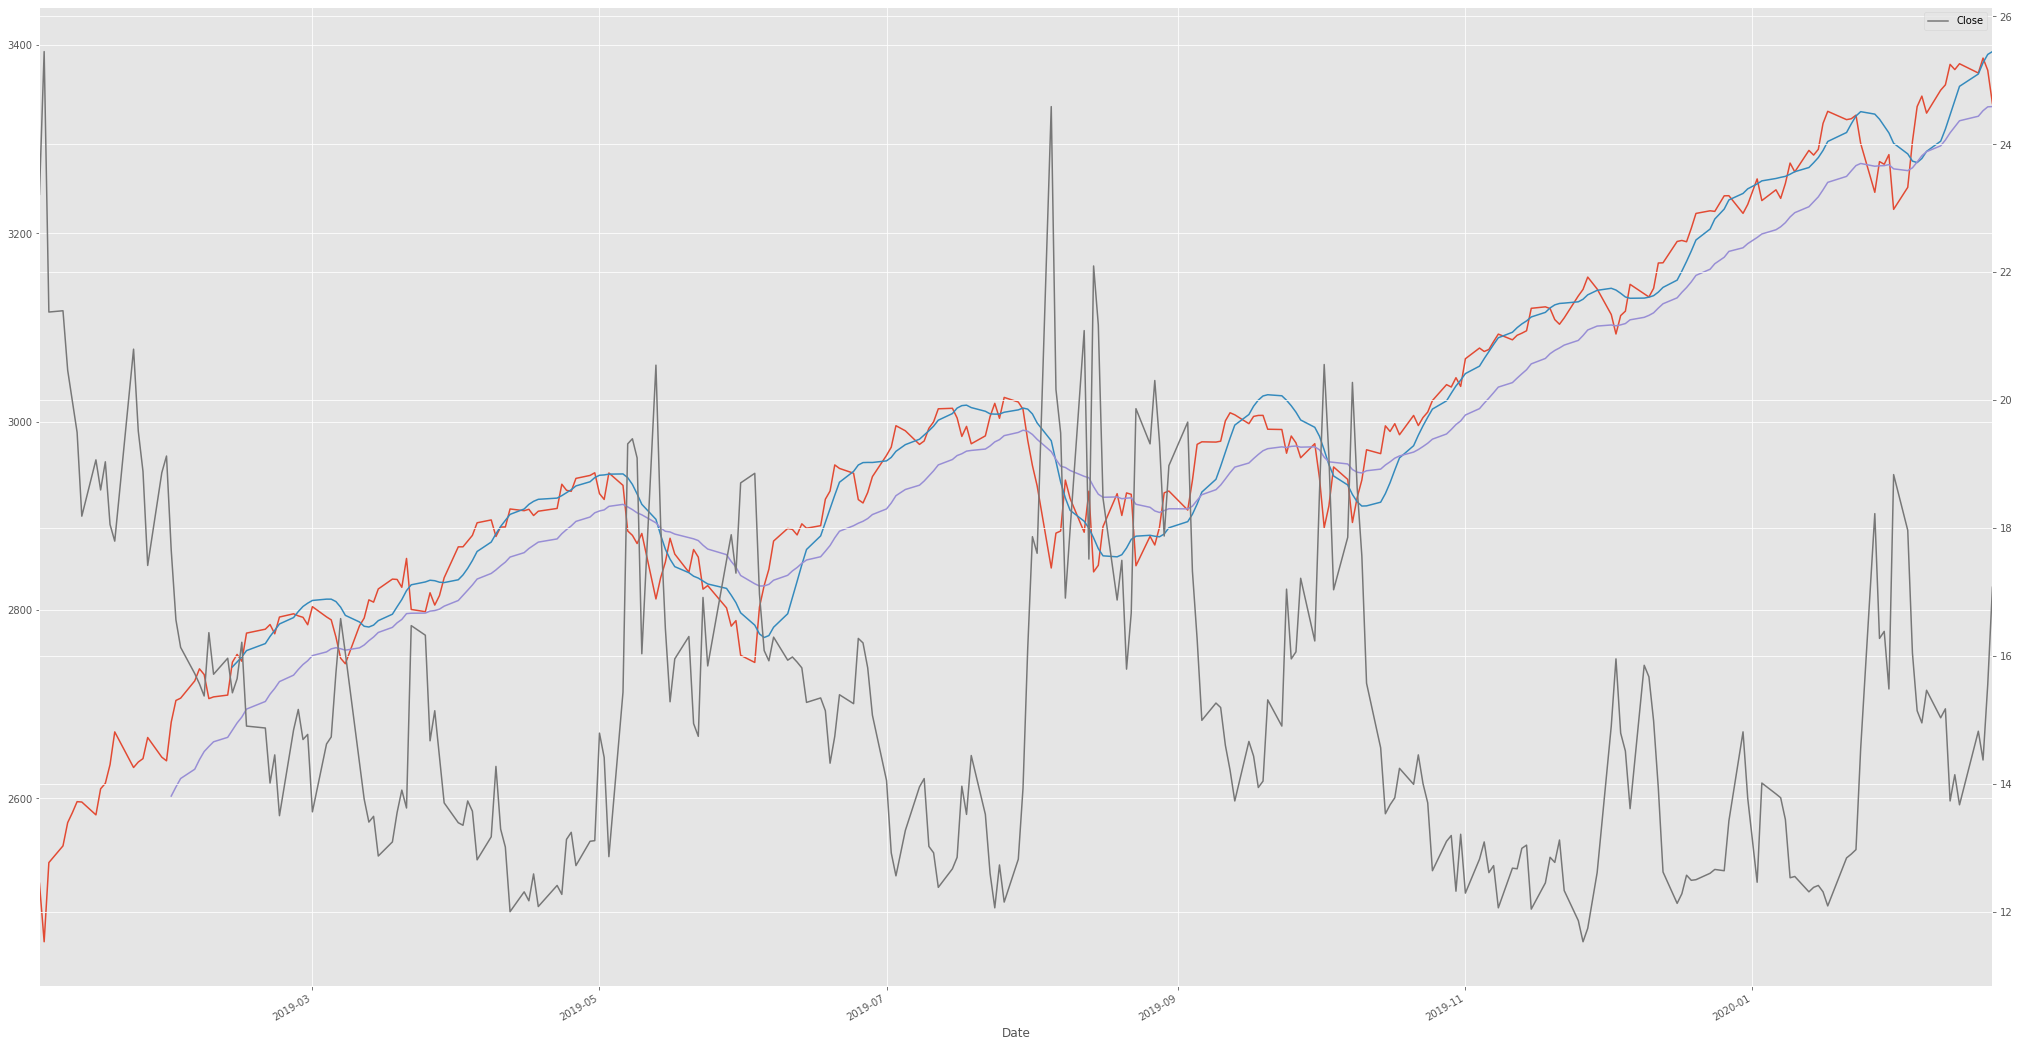

In [0]:
spy5.Close.plot(figsize=(35,20))
spy5.hma.plot()
spy5.hma2.plot()
#spy5.hma3.plot()
#spy5.ema.plot()
vix.Close.plot(secondary_y=True,grid= True)
#plt.grid()
plt.legend()

In [0]:
spy

,High,Low,Open,Close,Volume,Adj Close,hma
Date,,,,,,,
2018-01-02,268.809998,267.399994,267.839996,268.769989,86655700.0,258.858276,NaN
2018-01-03,270.640015,268.959991,268.959991,270.470001,90070400.0,260.495544,NaN
2018-01-04,272.160004,270.540009,271.200012,271.609985,80636400.0,261.593475,NaN
2018-01-05,273.559998,271.950012,272.510010,273.420013,83524000.0,263.336731,NaN
2018-01-08,274.100006,272.980011,273.309998,273.920013,57319200.0,263.818329,NaN
...,...,...,...,...,...,...,...
2020-02-07,333.989990,331.600006,332.820007,332.200012,64139400.0,332.200012,328.680785
2020-02-10,334.750000,331.190002,331.230011,334.679993,42070000.0,334.679993,330.564567
2020-02-11,337.019989,334.679993,336.160004,335.260010,54864500.0,335.260010,332.395905


In [0]:
from matplotlib.finance import candlestick_ohlc 

ModuleNotFoundError: ignored